<a href="https://colab.research.google.com/github/Mouez-Yazidi/LLM-GenAI-Solutions-Notebooks/blob/master/Build_an_AI_Data_Analyst_Agent_with_SmolAgents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

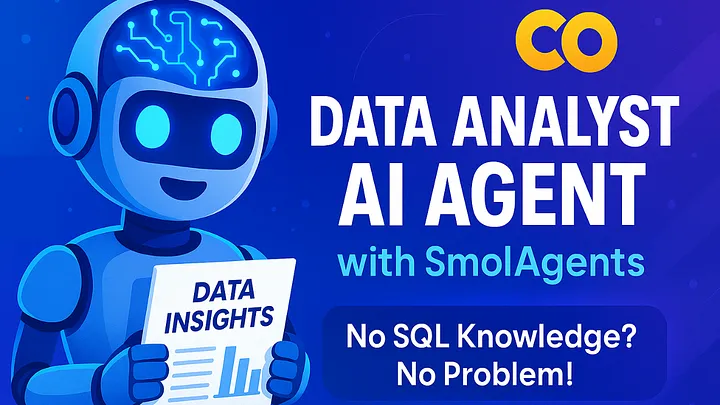

# **An overview about SmolAgent**
SmolAgents is a lightweight framework designed for building intelligent agents, multi-agent systems, and customizable tools. It provides the essential abstractions to handle complex tasks, enabling large language models (LLMs) to perform agentic loops, make decisions, and call external functions.


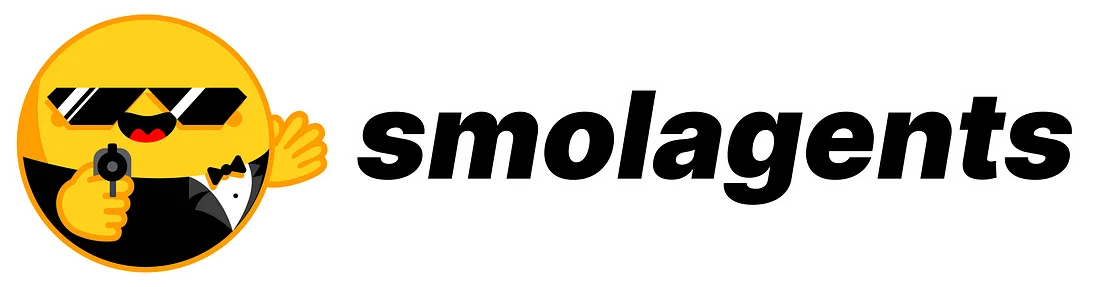

The framework is built around three core components:

* **LLMs** : the underlying models driving the agents’ intelligence.
* **Agents** : autonomous entities capable of reasoning and acting.
* **Tools** : custom functions or APIs that agents can use to interact with their environment.

SmolAgents is highly flexible, allowing seamless integration with LLMs from Hugging Face and other popular providers. Through LiteLLM, users can connect to models either locally or via hosted APIs, using Hugging Face’s Inference API or preconfigured transformer pipelines.

# **install olama**

In [1]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 10.2 MB/s eta 0:00:00


In [ ]:
#curl -fsSL https://ollama.com/install.sh | sh
# ollama serve & ollama pull gemma3:4b

In [27]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [14]:
!ollama list

NAME         ID              SIZE      MODIFIED       
gemma3:4b    a2af6cc3eb7f    3.3 GB    22 minutes ago    


# **Building the AI Data Analyst Agent: Step-by-Step**

In [5]:
!pip install smolagents litellm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 90.2 MB/s eta 0:00:00


In [6]:
# Import the necessary components from the smolagents library
from smolagents import CodeAgent, LiteLLMModel

In [24]:
# Initialize a lightweight LLM model using Ollama's Gemma 3 (4B) model
llm = LiteLLMModel(model_id='ollama/gemma3:4b')

In [25]:
# Create a CodeAgent that uses the Gemma 3 model to execute Python code dynamically
agent = CodeAgent(
    tools=[],  # No extra tools/plugins are included
    model=llm,  # Assign the initialized LLM as the model for reasoning and code generation
    additional_authorized_imports=[
        # Specify libraries that the agent is allowed to import and use during execution
        "pandas",              # For data manipulation and analysis
        "numpy",               # For numerical operations
        "datetime",            # For handling date and time
        "plotly.express",      # For interactive plotting
        "seaborn",             # For statistical visualizations
        "matplotlib.pyplot"    # For general-purpose plotting
    ],
)

In [34]:
# Define a structured prompt that guides the agent's behavior and tasks
prompt = """
## Instructions
- You are a highly skilled data analyst with expertise in Python and pandas.
- You will analyze the data in a CSV file using pandas.
- You must generate plots at each analysis stage to support findings
- Terminate execution as soon as the required response is obtained, regardless of whether all steps are finished.

## Analytics Steps
1. Load the CSV file into a pandas DataFrame.
2. Conduct EDA to understand the DataFrame's structure and content.
3. Create appropriate visualizations that help illustrate the insights related to each user question, making the data easier to interpret.
4. Summarize your key findings and insights with accompanying visualizations.

## Data information
# [Provide column names, data types (numerical/categorical), and brief descriptions here]

## User Question:
{query}
"""

# **Choose a  dataset**
I choose dataset from Kaggle:  [SuperStore Sales Dataset](https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset/data). It includes data for the Sales of multiple products sold by the store along with subsequent information related to geography, Product categories, and subcategories, sales, and profits, segmentation amongst the consumers, etc. Perfect for demonstrating the capabilities of our AI data analyst agent.

# **Test the AI Agent with 3 mains questions**

### **Q1 : What are the top 10 best-selling products based on total quantity sold?**

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ## Instructions                                                                                                 │
│ - You are a highly skilled data analyst with expertise in Python and pandas.                                    │
│ - You will analyze the data in a CSV file using pandas.                                                         │
│ - You must generate plots at each analysis stage to support findings                                            │
│ - Terminate execution as soon as the required response is obtained, regardless of whether all steps are         │
│ finished.                                                                                                       │
│                                                                                                                 │
│ ## Analytics Steps                                                                                              │
│ 1. Load the CSV file into a pandas DataFrame.                                                                   │
│ 2. Conduct EDA to understand the DataFrame's structure and content.                                             │
│ 3. Create appropriate visualizations that help illustrate the insights related to each user question, making    │
│ the data easier to interpret.                                                                                   │
│ 4. Summarize your key findings and insights with accompanying visualizations.                                   │
│                                                                                                                 │
│ ## Data information                                                                                             │
│ # [Provide column names, data types (numerical/categorical), and brief descriptions here\]                      │
│                                                                                                                 │
│ ## User Question:                                                                                               │
│ What are the top 10 best-selling products based on total quantity sold?                                         │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'source_file': '/content/SuperStoreOrders.csv'}.                                                               │
│                                                                                                                 │
╰─ LiteLLMModel - ollama/gemma3:4b ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  df = pd.read_csv(source_file)                                                                                    
  print(df.head())                                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
          order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue   408        2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed   120        3   
2  Office Supplies      Storage      Tenex Box, Single Width    66        4   
3  Office Supplies        Paper  Enermax Note Cards, Premium    45        3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack   114        5   

   discount   profit  shipping_cost  order_priority  year  
0       0.0  106.140          35.46          Medium  2011  
1       0.1   36.036           9.72          Medium  2011  
2       0.0   29.640           8.17            High  2011  
3       0.5  -26.055           4.82            High  2011  
4       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]

Out: None

[Step 1: Duration 5.16 seconds| Input tokens: 2,368 | Output tokens: 115]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  product_sales = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)               
  print(product_sales)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

Out: None

[Step 2: Duration 5.76 seconds| Input tokens: 5,555 | Output tokens: 234]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  product_sales.plot(kind='bar', title='Top 10 Best-Selling Products by Quantity Sold')                            
  plt.xlabel('Product Name')                                                                                       
  plt.ylabel('Quantity Sold')                                                                                      
  plt.xticks(rotation=45)                                                                                          
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

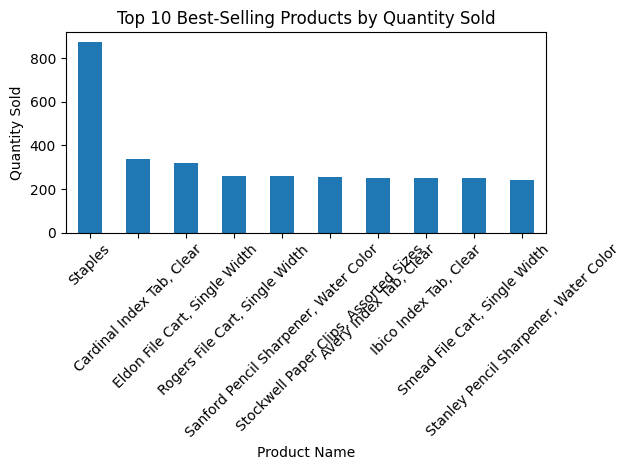

Out: None

[Step 3: Duration 6.04 seconds| Input tokens: 9,086 | Output tokens: 332]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  print("The top 10 best-selling products based on total quantity sold are: \n", product_sales)                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The top 10 best-selling products based on total quantity sold are: 
 product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

Out: None

[Step 4: Duration 4.15 seconds| Input tokens: 12,841 | Output tokens: 378]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(product_sales)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

[Step 5: Duration 4.16 seconds| Input tokens: 16,874 | Output tokens: 411]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


In [18]:
question = """What are the top 10 best-selling products based on total quantity sold?"""
formatted_prompt = prompt.format(query=question)

agent.run(
   formatted_prompt,
    additional_args = dict(source_file="/content/SuperStoreOrders.csv"),
   max_steps=5
)

### **Q2 : Which customer segment has the highest number of orders?**

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ## Instructions                                                                                                 │
│ - You are a highly skilled data analyst with expertise in Python and pandas.                                    │
│ - You will analyze the data in a CSV file using pandas.                                                         │
│ - You must generate plots at each analysis stage to support findings                                            │
│ - Terminate execution as soon as the required response is obtained, regardless of whether all steps are         │
│ finished.                                                                                                       │
│                                                                                                                 │
│ ## Analytics Steps                                                                                              │
│ 1. Load the CSV file into a pandas DataFrame.                                                                   │
│ 2. Conduct EDA to understand the DataFrame's structure and content.                                             │
│ 3. Create appropriate visualizations that help illustrate the insights related to each user question, making    │
│ the data easier to interpret.                                                                                   │
│ 4. Summarize your key findings and insights with accompanying visualizations.                                   │
│                                                                                                                 │
│ ## Data information                                                                                             │
│ # [Provide column names, data types (numerical/categorical), and brief descriptions here\]                      │
│                                                                                                                 │
│ ## User Question:                                                                                               │
│ Which customer segment has the highest number of orders?                                                        │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'source_file': '/content/SuperStoreOrders.csv'}.                                                               │
│                                                                                                                 │
╰─ LiteLLMModel - ollama/gemma3:4b ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Load the CSV file into a pandas DataFrame                                                                      
  df = pd.read_csv(source_file)                                                                                    
  print(df.head())                                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
          order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue   408        2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed   120        3   
2  Office Supplies      Storage      Tenex Box, Single Width    66        4   
3  Office Supplies        Paper  Enermax Note Cards, Premium    45        3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack   114        5   

   discount   profit  shipping_cost  order_priority  year  
0       0.0  106.140          35.46          Medium  2011  
1       0.1   36.036           9.72          Medium  2011  
2       0.0   29.640           8.17            High  2011  
3       0.5  -26.055           4.82            High  2011  
4       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]

Out: None

[Step 1: Duration 5.71 seconds| Input tokens: 2,361 | Output tokens: 136]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Group the data by 'segment' and count the number of orders                                                     
  order_counts = df.groupby('segment')['order_id'].count()                                                         
                                                                                                                   
  # Sort the order counts in descending order                                                                      
  order_counts_sorted = order_counts.sort_values(ascending=False)                                                  
                                                                                                                   
  # Print the order counts                                                                                         
  print("Order Counts by Segment:")                                                                                
  print(order_counts_sorted)                                                                                       
                                                                                                                   
  # Create a bar chart to visualize the order counts                                                               
  plt.figure(figsize=(10, 6))                                                                                      
  order_counts_sorted.plot(kind='bar', color='skyblue')                                                            
  plt.title('Order Counts by Customer Segment')                                                                    
  plt.xlabel('Customer Segment')                                                                                   
  plt.ylabel('Number of Orders')                                                                                   
  plt.xticks(rotation=45)                                                                                          
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

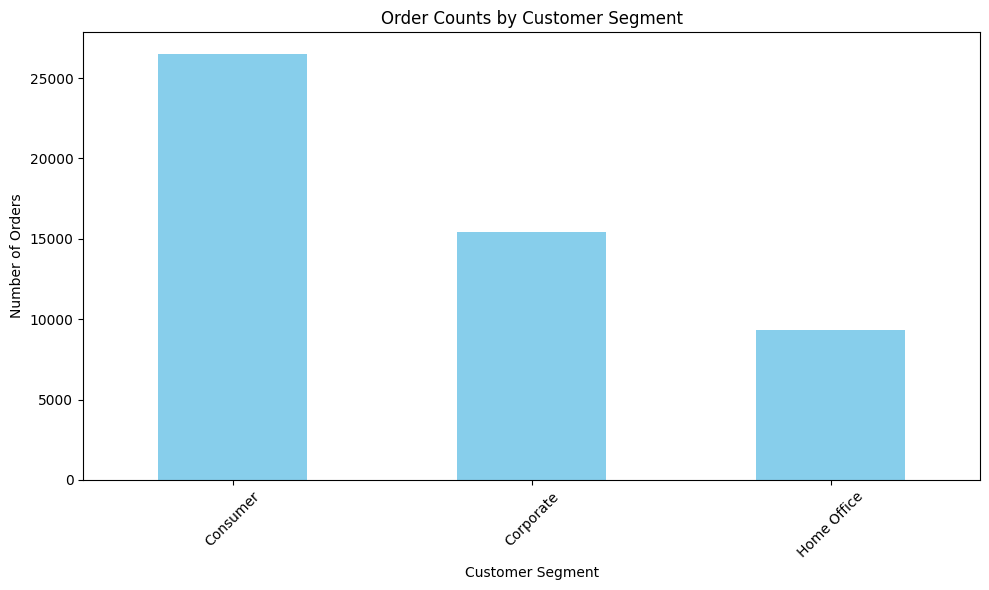

Execution logs:
Order Counts by Segment:
segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: order_id, dtype: int64

Out: None

[Step 2: Duration 8.64 seconds| Input tokens: 5,573 | Output tokens: 365]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Consumer")                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Consumer

[Step 3: Duration 4.60 seconds| Input tokens: 9,321 | Output tokens: 427]

'Consumer'

In [19]:
question = """Which customer segment has the highest number of orders?"""
formatted_prompt = prompt.format(query=question)

agent.run(
   formatted_prompt,
    additional_args = dict(source_file="/content/SuperStoreOrders.csv"),
   max_steps=5
)

### **Q3: Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?**

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ## Instructions                                                                                                 │
│ - You are a highly skilled data analyst with expertise in Python and pandas.                                    │
│ - You will analyze the data in a CSV file using pandas.                                                         │
│ - You must generate plots at each analysis stage to support findings                                            │
│ - Terminate execution as soon as the required response is obtained, regardless of whether all steps are         │
│ finished.                                                                                                       │
│                                                                                                                 │
│ ## Analytics Steps                                                                                              │
│ 1. Load the CSV file into a pandas DataFrame.                                                                   │
│ 2. Conduct EDA to understand the DataFrame's structure and content.                                             │
│ 3. Create appropriate visualizations that help illustrate the insights related to each user question, making    │
│ the data easier to interpret.                                                                                   │
│ 4. Summarize your key findings and insights with accompanying visualizations.                                   │
│                                                                                                                 │
│ ## Data information                                                                                             │
│ # [Provide column names, data types (numerical/categorical), and brief descriptions here\]                      │
│                                                                                                                 │
│ ## User Question:                                                                                               │
│ Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?                 │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'source_file': '/content/SuperStoreOrders.csv'}.                                                               │
│                                                                                                                 │
╰─ LiteLLMModel - ollama/gemma3:4b ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  df = pd.read_csv(source_file)                                                                                    
  print(df.head())                                                                                                 
  print(df.info())                                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Execution logs:
          order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers, Blue   408        2   
1  Office Supplies     Supplies     Acme Trimmer, High Speed   120        3   
2  Office Supplies      Storage      Tenex Box, Single Width    66        4   
3  Office Supplies        Paper  Enermax Note Cards, Premium    45        3   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack   114        5   

   discount   profit  shipping_cost  order_priority  year  
0       0.0  106.140          35.46          Medium  2011  
1       0.1   36.036           9.72          Medium  2011  
2       0.0   29.640           8.17            High  2011  
3       0.5  -26.055           4.82            High  2011  
4       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]
None

Out: None

[Step 1: Duration 6.08 seconds| Input tokens: 2,374 | Output tokens: 129]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  print(df['profit'].sum())                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
1469034.8212799998

Out: None

[Step 2: Duration 3.69 seconds| Input tokens: 5,591 | Output tokens: 173]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  top_10_customers = df.groupby('customer_name')['profit'].sum().sort_values(ascending=False).head(10)             
  print(top_10_customers)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
customer_name
Tamara Chand       8672.89890
Raymond Buch       8453.04950
Sanjit Chand       8205.37990
Hunter Lopez       7816.56778
Bill Eplett        7410.00530
Harry Marie        6958.28640
Susan Pistek       6484.40726
Mike Gockenbach    6458.67620
Adrian Barton      6417.28450
Tom Ashbrook       6311.97910
Name: profit, dtype: float64

Out: None

[Step 3: Duration 5.05 seconds| Input tokens: 8,941 | Output tokens: 258]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  plt.figure(figsize=(10,6))                                                                                       
  plt.bar(top_10_customers.index, top_10_customers.values)                                                         
  plt.xlabel("Customer Name")                                                                                      
  plt.ylabel("Profit")                                                                                             
  plt.title("Top 10 Customers by Profit")                                                                          
  plt.xticks(rotation=45, ha="right")                                                                              
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

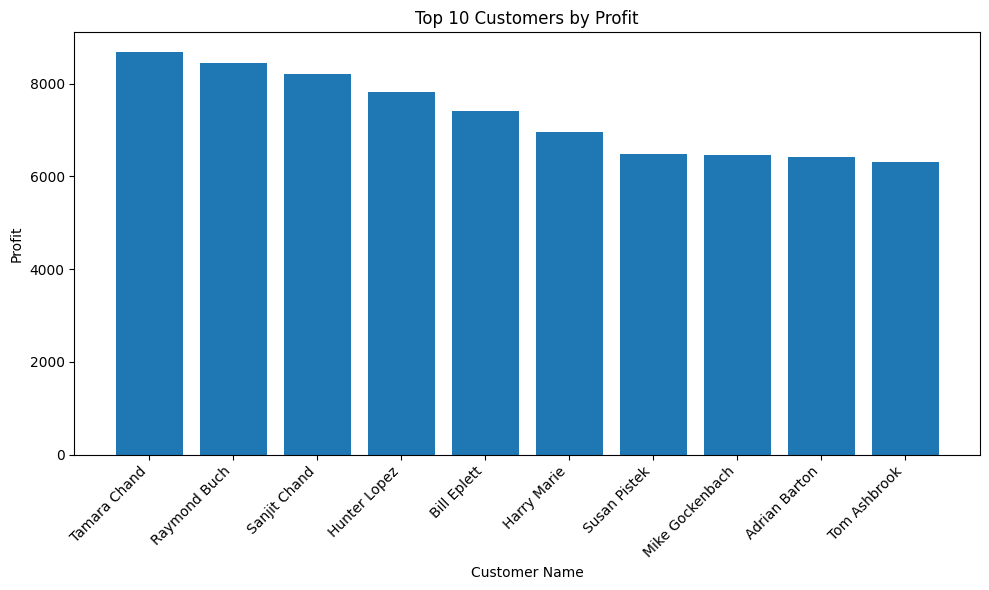

Out: None

[Step 4: Duration 6.42 seconds| Input tokens: 12,642 | Output tokens: 381]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Error in code parsing:
Your code snippet is invalid, because the regex pattern <code>(.*?)</code> was not found in it.
            Here is your code snippet:
            ### Assistant:
Thought: I have successfully plotted the top 10 customers by profit. Now I'll summarize my key findings and 
insights.

**Key Findings:**

*   The top customer by profit is Tamara Chand with a profit of 8672.89.
*   Raymond Buch is the second-highest profit contributor at 8453.05.
*   Sanjit Chand is the third-highest with 8205.38.
*   The data reveals significant profit variations among customers, indicating potential opportunities for targeted
sales strategies or customer retention efforts.

**Insights:**

*   Further investigation into the customer behaviors and preferences of Tamara Chand, Raymond Buch, and Sanjit 
Chand could reveal valuable insights for optimizing sales and marketing campaigns.

I have successfully analyzed the data and presented the key findings and insights.
</code>
            Make sure to include code with the correct pattern, for instance:
            Thoughts: Your thoughts
            <code>
            # Your python code here
            </code>
Make sure to provide correct code blobs.

[Step 5: Duration 7.89 seconds| Input tokens: 16,619 | Output tokens: 562]

Reached max steps.

[Step 6: Duration 27.00 seconds| Input tokens: 19,247 | Output tokens: 1,532]

'Okay, let\'s analyze the SuperStore data to identify the top 10 customers and their profit contribution.\n\n**1. Data Loading and Initial Exploration**\n\nI\'ll start by loading the data from the CSV file into a pandas DataFrame and performing some initial exploration to understand the data\'s structure.\n\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the data\ndf = pd.read_csv(source_file)\n\n# Display the first few rows\nprint(df.head())\n\n# Print data types and summary statistics\nprint(df.info())\n```\n\nThis code loads the \'SuperStoreOrders.csv\' file into a DataFrame called `df`. Then, it prints the first 5 rows to get a sense of the data, and it prints the DataFrame\'s info which displays the data types of each column and summary statistics like non-null counts.\n\n**2. Data Cleaning and Preprocessing**\n\nBefore further analysis, let\'s handle any missing values and ensure the data is in the correct format.  I\'ll address the most common issues, 

In [33]:
question = """Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?"""
formatted_prompt = prompt.format(query=question)

agent.run(
   formatted_prompt,
    additional_args = dict(source_file="/content/SuperStoreOrders.csv"),
   max_steps=5
)

# **Tips & Best Practices for Building and Using This Agent**
* Use additional_authorized_imports to explicitly control which libraries the agent can access.
* Ask clear and specific questions to guide the agent effectively.
* Outline each step in your prompt to improve accuracy and completeness.
* Include detailed information about your data, such as column names, data types, and context.